In [1]:
using DataFrames, CSV, Plots, GLM, Statistics, StatsPlots, Distributions, StatsBase, StatsModels, MLBase

In [2]:
cd("/Users/ning/Library/Mobile Documents/com~apple~CloudDocs/Working_Directory/Tex_MD/Teaching/tutorial/6003/W3")

In [3]:
df = CSV.read("cpi.csv", DataFrame);

In [4]:
names(df)

2-element Vector{String}:
 "month"
 "cpi"

In [5]:
first(df, 4)

,month,cpi
,String7,Float64
1,1983m1,97.9
2,1983m2,98.0
3,1983m3,98.1
4,1983m4,98.8


In [6]:
last(df,4)

,month,cpi
,String7,Float64
1,2018m9,252.01
2,2018m10,252.794
3,2018m11,252.76
4,2018m12,252.723


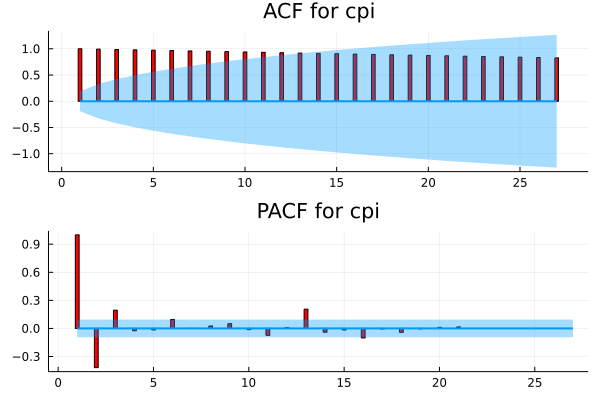

In [7]:
acf_cpi  = autocor(df.cpi);
acf2_cpi = acf_cpi.^2;
pacf_cpi = pacf(df.cpi,[1:1:21;]);

se_acf_cpi = []

for i in [1:size(acf_cpi)[1];]  
    push!(se_acf_cpi, sqrt((1+2*sum(acf2_cpi[1:i-1]))/108));   
end

ub_acf_cpi = se_acf_cpi * quantile(TDist(size(df)[1]-1), 0.975);
lb_acf_cpi = se_acf_cpi * quantile(TDist(size(df)[1]-1), 0.025);

ub_pacf_cpi = quantile(TDist(size(df)[1]-1), 0.975) / sqrt(size(df)[1]);
lb_pacf_cpi = quantile(TDist(size(df)[1]-1), 0.025) / sqrt(size(df)[1]);

p1 = bar(acf_cpi, title = "ACF for cpi", c = "red", legend = :topright, bar_width = 0.2)
p1 = plot!(zeros(size(acf_cpi)[1]), ribbon = (ub_acf_cpi .- lb_acf_cpi)./2 , fillalpha = 0.35, c = 1, lw = 2)

p2 = bar(pacf_cpi, title = "PACF for cpi", c = "red", legend = false, bar_width = 0.2)
p2 = plot!(zeros(size(acf_cpi)[1]), ribbon = (ub_pacf_cpi .- lb_pacf_cpi)./2 , fillalpha = 0.35, c = 1, lw = 2)

plot(p1, p2, layout = (2, 1), legend = false)

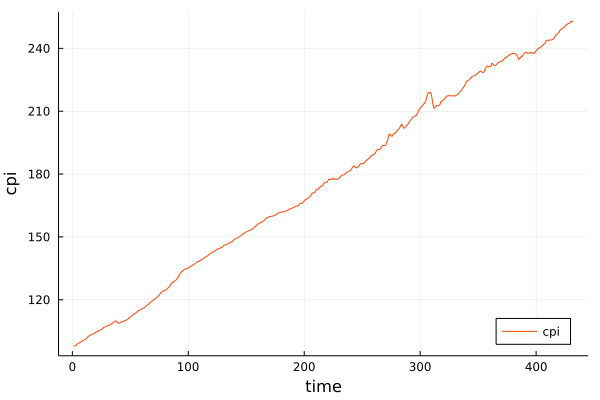

In [8]:
plot(xlabel="time", ylabel="cpi", legend=:bottomright)
plot!(df.cpi, color="orangered", label="cpi")

In [35]:
df[!,:infl] = (df[!,:cpi] .- lag(df[!,:cpi], 12)) ./ lag(df[!,:cpi], 12);

first(df,15)

,month,cpi,infl
,String7,Float64,Float64?
1,1983m1,97.9,missing
2,1983m2,98.0,missing
3,1983m3,98.1,missing
4,1983m4,98.8,missing
5,1983m5,99.2,missing
6,1983m6,99.4,missing
7,1983m7,99.8,missing
8,1983m8,100.1,missing
9,1983m9,100.4,missing


In [52]:
df1 = df[13:end,:];
infl = df1.infl * 1.;

(420,)

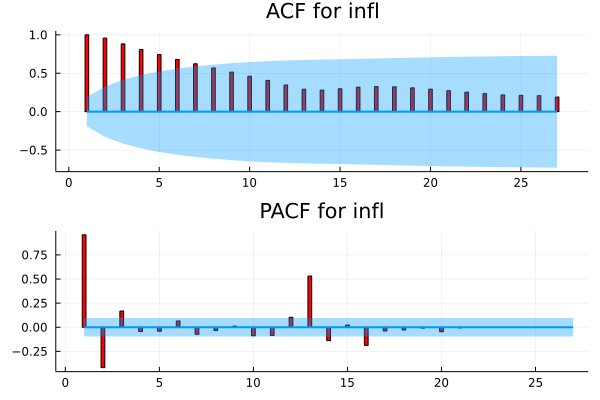

In [53]:
acf_infl  = autocor(infl);
acf2_infl = acf_infl.^2;
pacf_infl = pacf(infl,[1:1:21;]);

se_acf_infl = []

for i in [1:size(acf_infl)[1];]  
    push!(se_acf_infl, sqrt((1+2*sum(acf2_infl[1:i-1]))/108));   
end

ub_acf_infl = se_acf_infl * quantile(TDist(size(infl)[1]-1), 0.975);
lb_acf_infl = se_acf_infl * quantile(TDist(size(infl)[1]-1), 0.025);

ub_pacf_infl = quantile(TDist(size(infl)[1]-1), 0.975) / sqrt(size(infl)[1]);
lb_pacf_infl = quantile(TDist(size(infl)[1]-1), 0.025) / sqrt(size(infl)[1]);

p1 = bar(acf_infl, title = "ACF for infl", c = "red", legend = :topright, bar_width = 0.2)
p1 = plot!(zeros(size(acf_infl)[1]), ribbon = (ub_acf_infl .- lb_acf_infl)./2 , fillalpha = 0.35, c = 1, lw = 2)

p2 = bar(pacf_infl, title = "PACF for infl", c = "red", legend = false, bar_width = 0.2)
p2 = plot!(zeros(size(acf_infl)[1]), ribbon = (ub_pacf_infl .- lb_pacf_infl)./2 , fillalpha = 0.35, c = 1, lw = 2)

plot(p1, p2, layout = (2, 1), legend = false)

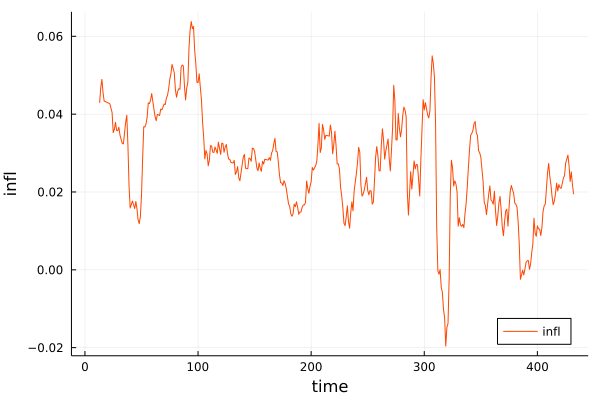

In [54]:
plot(xlabel="time", ylabel="infl", legend=:bottomright)
plot!(df.infl, color="orangered", label="infl")

In [57]:
run(`rm -rf W3_Julia.html`)
run(`jupyter nbconvert --to html W3_Julia.ipynb`)

[NbConvertApp] Converting notebook W3_Julia.ipynb to html
[NbConvertApp] Writing 818051 bytes to W3_Julia.html


Process(`jupyter nbconvert --to html W3_Julia.ipynb`, ProcessExited(0))